# Looking for patterns in random sequences
Yehor created a directed graph of the 2-digit chaotic feedback function we examined in class.
This is a very cool way of visualizing the system - it shows all possible transitions, revealing loops and other structures.

In [1]:
import time

import matplotlib.pyplot as plt
import networkx as nx

In [5]:
class TwoDigitRand:
    """ demonstrates 'chaotic feedback' algorithm - not crypographic quality randomness!! """
    def __init__(self, seed=None):
        seed = seed or int(time.time()*10**3)  # clock time in milli-seconds
        self.seed = seed % 100  # 2-digit only!

    def rand(self):
        """ chaotic feedback algorithm - the last output is used as input to compute the next one """
        self.seed = self.seed//10 + 7*(self.seed%10)
        return self.seed

r = TwoDigitRand(8)
[r.rand() for i in range(100)]

[56,
 47,
 53,
 26,
 44,
 32,
 17,
 50,
 5,
 35,
 38,
 59,
 68,
 62,
 20,
 2,
 14,
 29,
 65,
 41,
 11,
 8,
 56,
 47,
 53,
 26,
 44,
 32,
 17,
 50,
 5,
 35,
 38,
 59,
 68,
 62,
 20,
 2,
 14,
 29,
 65,
 41,
 11,
 8,
 56,
 47,
 53,
 26,
 44,
 32,
 17,
 50,
 5,
 35,
 38,
 59,
 68,
 62,
 20,
 2,
 14,
 29,
 65,
 41,
 11,
 8,
 56,
 47,
 53,
 26,
 44,
 32,
 17,
 50,
 5,
 35,
 38,
 59,
 68,
 62,
 20,
 2,
 14,
 29,
 65,
 41,
 11,
 8,
 56,
 47,
 53,
 26,
 44,
 32,
 17,
 50,
 5,
 35,
 38,
 59]

## Generate a directional graph
Each edge shows the next value in sequence from the source node.

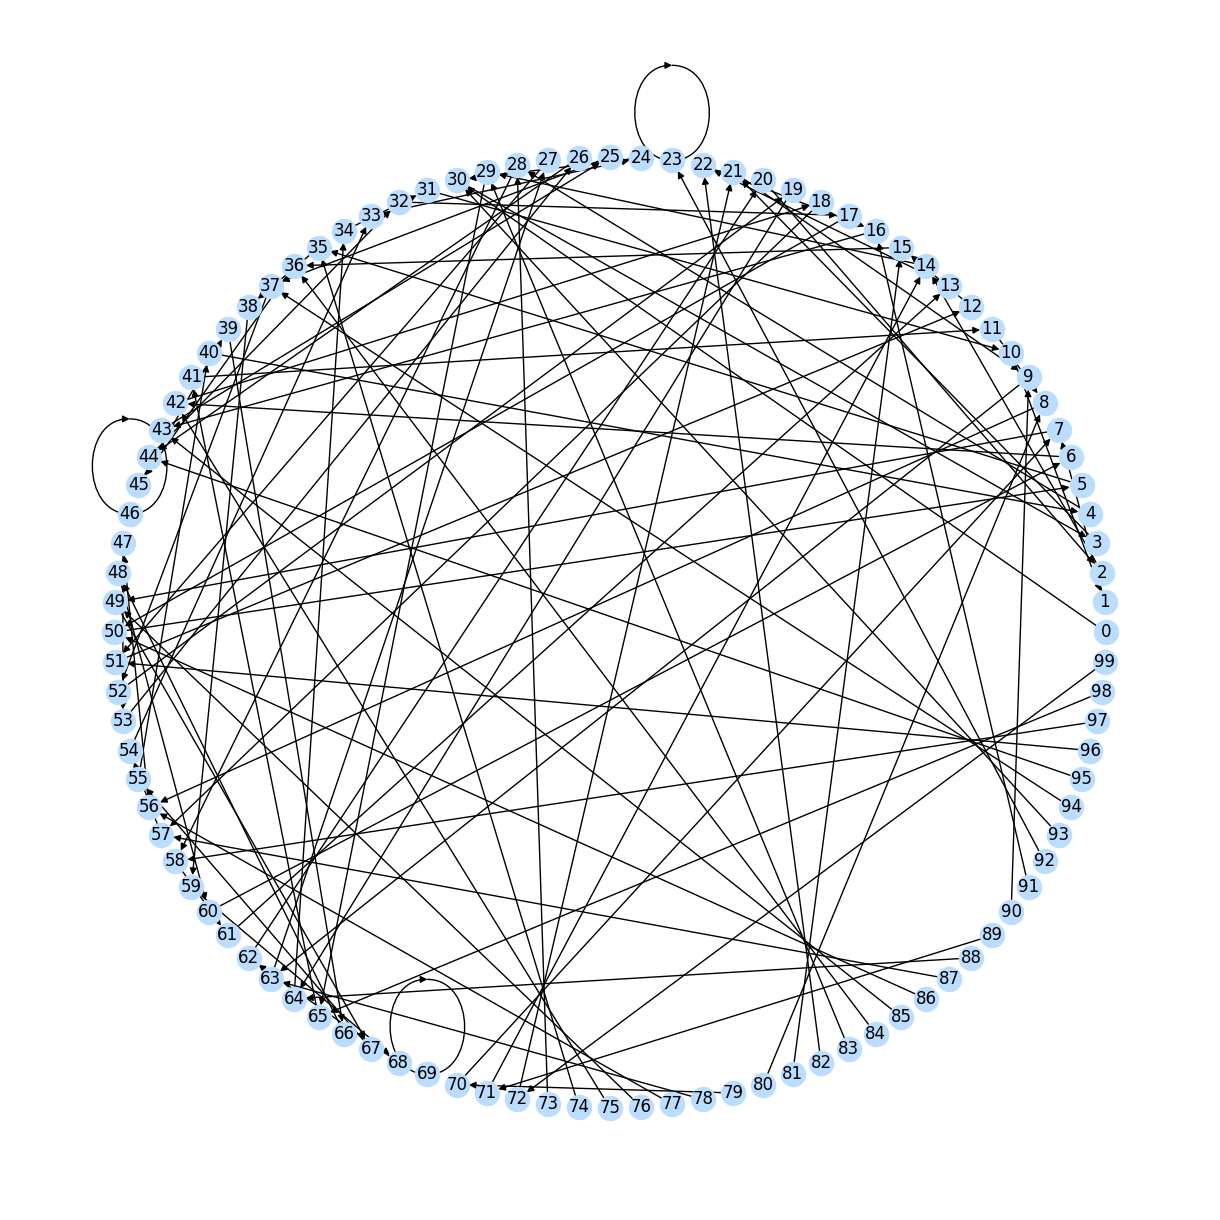

In [3]:
g = nx.DiGraph()
nodes = list(range(100))  ## all 1 and 2 digit positive numbers
g.add_nodes_from(nodes)

for source in nodes:
    r = TwoDigitRand(seed=source)
    dest = r.rand()
    g.add_edge(source, dest)

plt.figure(figsize=(12,12))
nx.draw_circular(g,
                 node_color='#bbddff',
                 with_labels=True,)
plt.show()

### Observations
So many interesting things in this display.   For example, we see there are 3 "tight loops" where the generator outputs the same value every time.  We can also see there are many nodes that are not part of any sequence -- i.e., they are never the destination.  For example, every node with a value > 72.

### Visualizing these results further
Yehor asked me how one could plot the "sources" for each "destination" value as a way of visualizing how frequently we might expect a given value to occur in a sequence initialized with a random seed.

[(10, 1), (20, 2), (30, 3), (40, 4), (50, 5), (60, 6), (1, 7), (70, 7), (11, 8), (80, 8), (21, 9), (90, 9), (31, 10), (41, 11), (51, 12), (61, 13), (2, 14), (71, 14), (12, 15), (81, 15), (22, 16), (91, 16), (32, 17), (42, 18), (52, 19), (62, 20), (3, 21), (72, 21), (13, 22), (82, 22), (23, 23), (92, 23), (33, 24), (43, 25), (53, 26), (63, 27), (4, 28), (73, 28), (14, 29), (83, 29), (24, 30), (93, 30), (34, 31), (44, 32), (54, 33), (64, 34), (5, 35), (74, 35), (15, 36), (84, 36), (25, 37), (94, 37), (35, 38), (45, 39), (55, 40), (65, 41), (6, 42), (75, 42), (16, 43), (85, 43), (26, 44), (95, 44), (36, 45), (46, 46), (56, 47), (66, 48), (7, 49), (76, 49), (17, 50), (86, 50), (27, 51), (96, 51), (37, 52), (47, 53), (57, 54), (67, 55), (8, 56), (77, 56), (18, 57), (87, 57), (28, 58), (97, 58), (38, 59), (48, 60), (58, 61), (68, 62), (9, 63), (78, 63), (19, 64), (88, 64), (29, 65), (98, 65), (39, 66), (49, 67), (59, 68), (69, 69), (79, 70), (89, 71), (99, 72)]


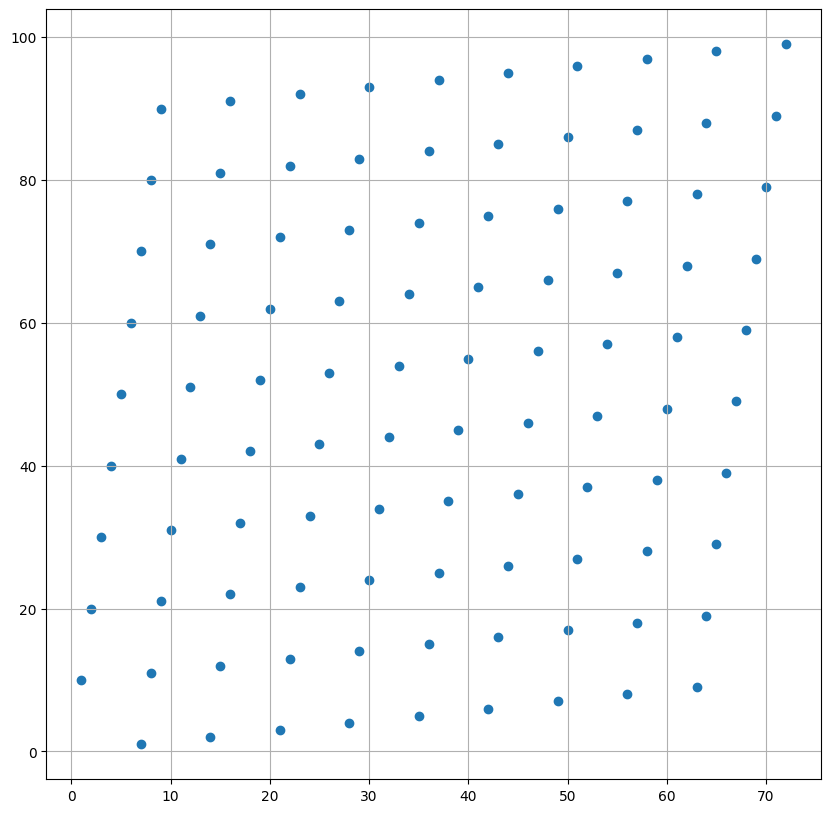

In [4]:
edges = [(seed, TwoDigitRand(seed=seed).rand()) for seed in list(range(1,100))]
edges.sort(key=lambda t: t[1])
print(edges)

plt.subplots(figsize=(10, 10))
plt.scatter([e[1] for e in edges], [e[0] for e in edges])
plt.grid()
plt.show()